<a href="https://colab.research.google.com/github/Pranavvv08/MachineLearning/blob/main/prac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### BFS

In [1]:
graph = {
    'A':['B' , 'C' , 'D'],
    'B':['A' , 'E' , 'F'],
    'C':['A' , 'G' , 'H'],
    'D':['A' , 'B'],
    'E':['B'],
    'F':['B'],
    'G':['C'],
    'H':['C' , 'D'],
    }

visited=[]
queue=[]
def bfs(visited, graph, node):
  visited.append(node)
  queue.append(node)
  while queue:
    m=queue.pop(0)
    print(m,end=" ")
    for neighbour in graph[m]:
      if neighbour not in visited:
        visited.append(neighbour)
        queue.append(neighbour)
print("following is the Breadth-First-Search")
bfs(visited,graph,'A')

following is the Breadth-First-Search
A B C D E F G H 

### DFS

In [4]:
graph = {
    'A':['B' , 'C' , 'D'],
    'B':['A' , 'E' , 'F'],
    'C':['A' , 'G' , 'H'],
    'D':['A' , 'B'],
    'E':['B'],
    'F':['B'],
    'G':['C'],
    'H':['C' , 'D'],
    }

visited=set()
def dfs(node,visited,graph):
  if node not in visited:
    print(node,end=" ")
    visited.add(node)
    for i in graph[node]:
      dfs(i,visited,graph)
print("\nfollowing is the Depth-First-Search")
dfs("A",visited,graph)



following is the Depth-First-Search
A B E F C G H D 

### A STAR

In [13]:
def get_neighbours(v):
    if v in Graph_nodes:
        return Graph_nodes[v]
    else:
        return None

def h(n):
    h_dist = {'A': 11, 'B': 6, 'C': 5, 'D': 7, 'E': 3, 'F': 6, 'G': 5, 'H': 3, 'I': 1, 'J': 0}
    return h_dist[n]

def astaralgo(start_node, stop_node):
    open_set = set([start_node])
    closed_set = set()

    g = {}
    g[start_node] = 0

    parents = {}
    parents[start_node] = start_node

    while len(open_set) > 0:
        n = None

        # Find the node with the lowest F(n) = G(n) + H(n)
        for v in open_set:
            if n is None or g[v] + h(v) < g[n] + h(n):
                n = v

        if n is None:
            print("No path exists!")
            return None

        # If the goal node is reached, construct the path
        if n == stop_node:
            path = []
            while parents[n] != n:
                path.append(n)
                n = parents[n]
            path.append(start_node)
            path.reverse()
            print("Path found: {}".format(path))
            return path

        # Explore neighbors of the current node
        for (m, weight) in get_neighbours(n):
            if m not in open_set and m not in closed_set:
                open_set.add(m)
                parents[m] = n
                g[m] = g[n] + weight
            else:
                if g[m] > g[n] + weight:
                    g[m] = g[n] + weight
                    parents[m] = n
                    if m in closed_set:
                        closed_set.remove(m)
                        open_set.add(m)

        # Move the current node from open_set to closed_set
        open_set.remove(n)
        closed_set.add(n)

    print("Path does not exist!")
    return None

# Example usage
astaralgo('A', 'J')


Path found: ['A', 'F', 'G', 'I', 'J']


['A', 'F', 'G', 'I', 'J']

### TSP

In [17]:
from sys import maxsize
from itertools import permutations

v=4
def travellingSalesmanProblem(graph,s):
    vertex=[]
    for i in range(v):
        if i!=s:
            vertex.append(i)
    min_path=maxsize
    next_permutation=permutations(vertex)
    for i in next_permutation:
        current_pathweight=0
        k=s
        for j in i:
            current_pathweight+=graph[k][j]
            k=j
        current_pathweight+=graph[k][s]
        min_path=min(min_path,current_pathweight)
    return min_path

graph = [[1, 2, 3,4], [5, 6, 7, 8],
	    [9, 10, 11, 12], [13, 14, 15, 16]]
s = 0
print(travellingSalesmanProblem(graph, s))


34


### graph coloring

In [20]:
colors = ['pink', 'yellow', 'black']
states = ['andhra', 'karnataka', 'tamilnadu', 'kerala']
neighbours = {
    'andhra': ['karnataka', 'tamilnadu'],
    'karnataka': ['andhra', 'tamilnadu', 'kerala'],
    'tamilnadu': ['andhra', 'karnataka', 'kerala'],
    'kerala': ['karnataka', 'tamilnadu']
}
colors_of_states = {}
def promising(state,color):
    for neighbour in neighbours.get(state):
        color_of_neighbour=colors_of_states.get(neighbour)
        if color_of_neighbour==color:
            return False
    return True
def get_color_for_state(state):
    for color in colors:
        if promising(state,color):
            return color
def main():
    for state in states:
        colors_of_states[state]=get_color_for_state(state)
    print(colors_of_states)
main()


{'andhra': 'pink', 'karnataka': 'yellow', 'tamilnadu': 'black', 'kerala': 'pink'}


###Bayesian network

In [ ]:
import numpy as np

from pomegranate import *

# Define the distributions
guest = DiscreteDistribution({'A': 1./3, 'B': 1./3, 'C': 1./3})
prize = DiscreteDistribution({'A': 1./3, 'B': 1./3, 'C': 1./3})

# Define the Conditional Probability Table (CPT)
monty = ConditionalProbabilityTable(
    [
        ['A', 'A', 'A', 0.0],
        ['A', 'A', 'B', 0.5],
        ['A', 'A', 'C', 0.5],
        ['A', 'B', 'A', 0.0],
        ['A', 'B', 'B', 0.0],
        ['A', 'B', 'C', 1.0],
        ['A', 'C', 'A', 0.0],
        ['A', 'C', 'B', 1.0],
        ['A', 'C', 'C', 0.0],
        ['B', 'A', 'A', 0.0],
        ['B', 'A', 'B', 0.0],
        ['B', 'A', 'C', 1.0],
        ['B', 'B', 'A', 0.5],
        ['B', 'B', 'B', 0.0],
        ['B', 'B', 'C', 0.5],
        ['B', 'C', 'A', 1.0],
        ['B', 'C', 'B', 0.0],
        ['B', 'C', 'C', 0.0],
        ['C', 'A', 'A', 0.0],
        ['C', 'A', 'B', 1.0],
        ['C', 'A', 'C', 0.0],
        ['C', 'B', 'A', 1.0],
        ['C', 'B', 'B', 0.0],
        ['C', 'B', 'C', 0.0],
        ['C', 'C', 'A', 0.5],
        ['C', 'C', 'B', 0.5],
        ['C', 'C', 'C', 0.0]
    ], [guest, prize]
)

# Create the states
s1 = State(guest, name="guest")
s2 = State(prize, name="prize")
s3 = State(monty, name="monty")

# Create the Bayesian Network and add the states and edges
model = BayesianNetwork("Monty Hall Problem")
model.add_states(s1, s2, s3)
model.add_edge(s1, s3)
model.add_edge(s2, s3)
model.bake()

# Calculate probabilities and make predictions
print(model.probability([['A', 'B', 'C'], ['A', 'A', 'C'], ['A', 'C', 'C']]))
print(model.predict([['A', None, 'C'], ['A', 'A', None], [None, 'B', 'A']]))

### knowledge Base

In [24]:
from sympy import symbols, Or, Not, Implies, satisfiable
rain=symbols('rain')
harry_visited_hagrid=symbols('harry_visited_hagrid')
harry_visited_Dumbledore=symbols('harry_visited_Dumbledore')
sentence1=Implies((rain),harry_visited_hagrid)
sentence2=(Or(harry_visited_Dumbledore,harry_visited_hagrid)&Not(harry_visited_Dumbledore & harry_visited_hagrid))
sentence3=harry_visited_Dumbledore
knowbase=sentence1&sentence2&sentence3
solution=satisfiable(knowbase,all_models=True)

for model in solution:
    if model[rain]:
        print("no rain")
    else:
        print("it rained")


it rained


###Regression

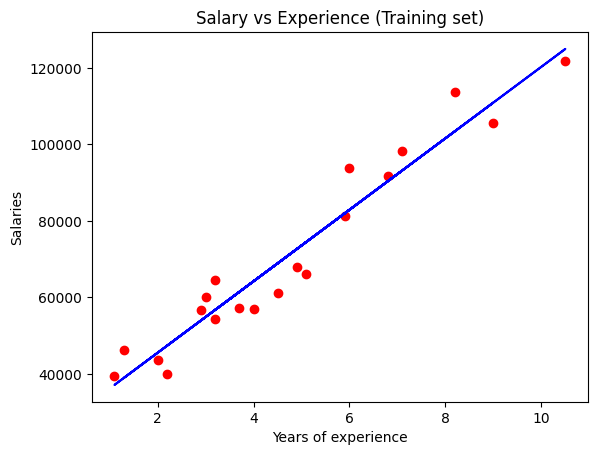

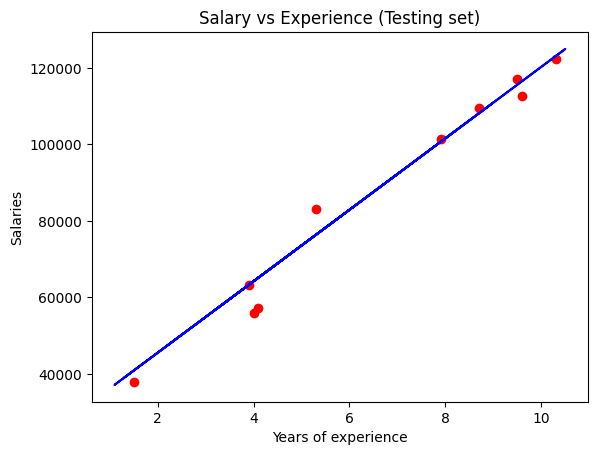

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/simple-Linear-Regression/refs/heads/master/Salary_Data.csv')
dataset.head()
# data preprocessing
X = dataset.iloc[:, :-1].values  #independent variable array
y = dataset.iloc[:,1].values  #dependent variable vector
# splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=0)
# fitting the regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train) #actually produces the linear eqn for the data
# predicting the test set results
y_pred = regressor.predict(X_test)
y_pred
y_test
# visualizing the results
#plot for the TRAIN
plt.scatter(X_train, y_train, color='red') # plotting the observation line
plt.plot(X_train, regressor.predict(X_train), color='blue') # plotting the regression line
plt.title("Salary vs Experience (Training set)") # stating the title of the graph
plt.xlabel("Years of experience") # adding the name of x-axis
plt.ylabel("Salaries") # adding the name of y-axis
plt.show() # specifies end of graph
#plot for the TEST
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue') # plotting the regression line
plt.title("Salary vs Experience (Testing set)")
plt.xlabel("Years of experience")
plt.ylabel("Salaries")
plt.show()

### k Means

In [32]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np

In [33]:
iris=datasets.load_iris()

In [39]:
X=pd.DataFrame(iris.data)
X.columns=['Sepal_Length','Sepal_Width', 'Petal_length', 'Petal_Width']
y=pd.DataFrame(iris.target)
y.columns=['target']

Text(0.5, 1.0, 'Petal')

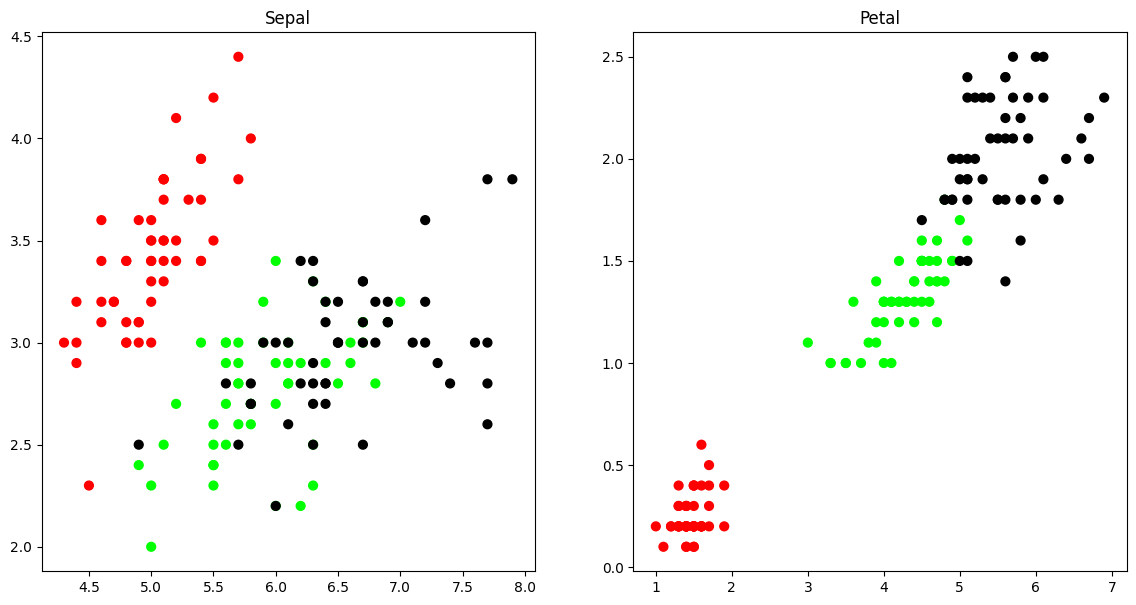

In [40]:
plt.figure(figsize=(14,7))
colormap=np.array(['red','lime','black'])
plt.subplot(1,2,1)
plt.scatter(X.Sepal_Length,X.Sepal_Width,c=colormap[y.target],s=40)
plt.title('Sepal')
plt.subplot(1,2,2)
plt.scatter(X.Petal_length,X.Petal_Width,c=colormap[y.target],s=40)
plt.title('Petal')

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


Text(0.5, 1.0, 'KMEANS Classfication')

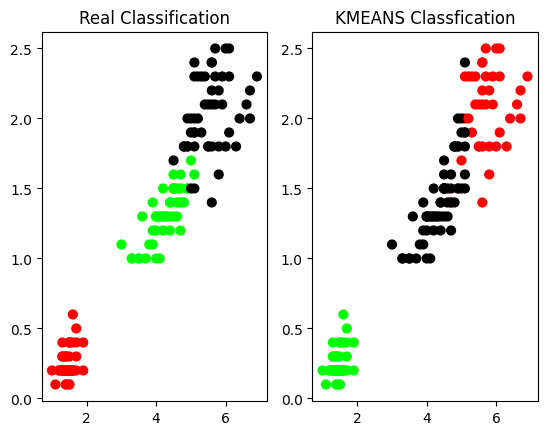

In [42]:
model=KMeans(n_clusters=3)
model.fit(X)
print(model.labels_)
plt.subplot(1,2,1)
plt.scatter(X.Petal_length,X.Petal_Width,c=colormap[y.target],s=40)
plt.title('Real Classification')
plt.subplot(1,2,2)
plt.scatter(X.Petal_length,X.Petal_Width,c=colormap[model.labels_],s=40)
plt.title( 'KMEANS Classfication')

### back propagation

In [44]:
import numpy as np

In [47]:
x= np.array(([2,9],[1,5],[3,6]))
y=np.array(([92],[86],[89]))
y=y/100
x=x/np.amax(x,axis=0)

def sigmoid(x):
    return 1/(1+np.exp(-x))

def derivatives_sigmoid(x):
    return x*(1-x)

epoch=10000
lr=0.1
inputlayer_neurons=2
hiddenlayer_neurons=3
output_neurons=1

wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
bias_hidden=np.random.uniform(size=(1,hiddenlayer_neurons))
weight_hidden=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
bias_output=np.random.uniform(size=(1,output_neurons))

for i in range(epoch):
    hinp=np.dot(x,wh)+bias_hidden
    hlayer_activation=sigmoid(hinp)

    outinp=np.dot(hinp,weight_hidden)+bias_output
    output=sigmoid(outinp)

EO=y-output
outgrad=derivatives_sigmoid(output)
d_output=outgrad*EO

EH=d_output.dot(weight_hidden.T)
hiddengrad=derivatives_sigmoid(hlayer_activation)
d_hiddenlayer=hiddengrad*EH

weight_hidden += hlayer_activation.T.dot(d_output) * lr
bias_hidden += np.sum(d_hiddenlayer, axis=0,keepdims=True) * lr
wh += x.T.dot(d_hiddenlayer) * lr
bias_output += np.sum(d_output,axis=0,keepdims=True) *lr

print("Input: \n"+str(X))
print("Actual Output: \n"+str(y))
print("Predicted Output: \n",output)


Input: 
     Sepal_Length  Sepal_Width  Petal_length  Petal_Width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.98403945]
 [0.96358369]
 [0.98836873]]


### Knn

In [48]:
import sklearn
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [49]:
iris=load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [50]:
print(iris['target_names'])


['setosa' 'versicolor' 'virginica']


In [51]:
print(iris['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [57]:
x=iris['data']
y=iris['target']

In [58]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33,random_state=40)

In [59]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [63]:
ypred=knn.predict(xtest)
yfa=pd.DataFrame(ypred,ytest)

In [65]:
cm=confusion_matrix(ytest,ypred)
cm

array([[18,  0,  0],
       [ 0, 15,  0],
       [ 0,  2, 15]])

In [67]:
print("Correct prediction", accuracy_score(ytest,ypred))
print("Wrong prediction", (1-accuracy_score(ytest,ypred)))

Correct prediction 0.96
Wrong prediction 0.040000000000000036


In [69]:
ytesttrain=knn.predict(xtrain)
cm1=confusion_matrix(ytrain,ytesttrain)
print(cm1)

[[32  0  0]
 [ 0 33  2]
 [ 0  2 31]]


### SVM

In [71]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [73]:
iris=load_iris()
x=iris.data
y=iris.target

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33,random_state=40)

svmmodel=SVC(kernel='linear')
svmmodel.fit(xtrain, ytrain)

SVC(kernel='linear')

In [ ]:
ypred=svmmodel.predict(xtest)
import pandas as pd
ysy=pd.DataFrame(ypred,ytest)
ysy

In [77]:
accuracy=accuracy_score(ytest,ypred)
accuracy

1.0

In [81]:
report_str = classification_report(ytest, ypred, output_dict=True)
report_df = pd.DataFrame(report_str).transpose()
report_df

,precision,recall,f1-score,support
0,1.0,1.0,1.0,18.0
1,1.0,1.0,1.0,15.0
2,1.0,1.0,1.0,17.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,50.0
weighted avg,1.0,1.0,1.0,50.0
